In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
# model parameters
# alpha=1 # prey's birth rate
# beta=1 # predation rate coefficient
# gamma=1 # predator's death rate
# delta=1 # predator's birth rate per prey consumed

In [3]:
# import from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
from google.colab import drive
# drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/spring2025/Modeling_Lab/[HW4]_Practical_class_4/LV_data.csv')
t_data = data['Time'].values
x_data = data['Prey'].values
y_data = data['Predator'].values
z0=[x_data[0],y_data[0]]
# z0=[10,1]

In [4]:
data.head()

,Time,Prey,Predator
0,0,30.0,4.0
1,1,47.2,6.1
2,2,70.2,9.8
3,3,77.4,35.2
4,4,36.3,59.4


In [9]:
# # plt.subplots(1,2,figsize=(10,4))
# param_sets = {
#   'all ones':       (1,1,1,1),
#   'slow predation': (1,0.05,0.1,1)
# }
# for x, (a,b,c,d) in param_sets.items():
#   print(f'{x}:{a},{b},{c},{d}')


all ones:1,1,1,1
slow predation:1,0.05,0.1,1


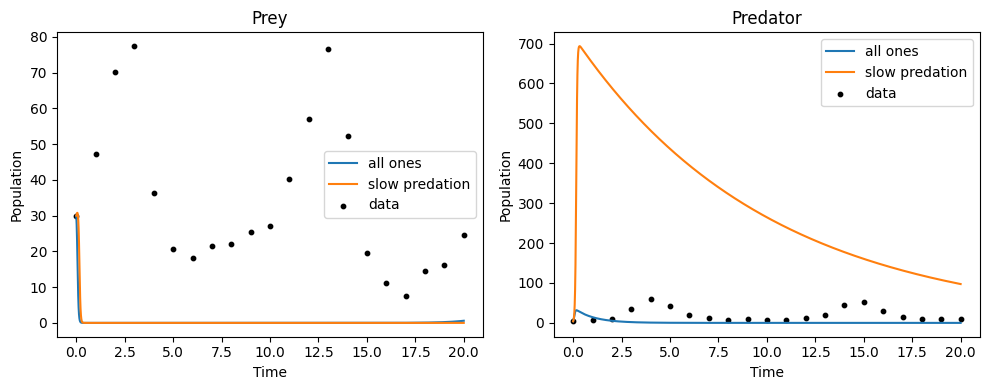

In [6]:

# Lotka–Volterra system
def lv(t, z, α, β, γ, δ):
    x, y = z
    dxdt = α * x - β * x * y
    dydt = δ * x * y - γ * y
    return [dxdt, dydt]

# Parameter sets
param_sets = {
    'all ones':       (1, 1, 1, 1),
    'slow predation': (1, 0.05, 0.1, 1)
}

# Initial condition and time

t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Load your experimental data (already done)
# t_data, x_data, y_data = ...

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for name, (α, β, γ, δ) in param_sets.items():
    sol = solve_ivp(lv, t_span, z0, args=(α, β, γ, δ), t_eval=t_eval)
    x_sim, y_sim = sol.y

    ax1.plot(sol.t, x_sim, label=name)
    ax2.plot(sol.t, y_sim, label=name)

# Overlay data points
ax1.scatter(t_data, x_data, c='k', s=10, label='data')
ax2.scatter(t_data, y_data, c='k', s=10, label='data')

# Axis formatting
ax1.set(title='Prey'); ax2.set(title='Predator')
for ax in (ax1, ax2):
    ax.set_xlabel('Time'); ax.set_ylabel('Population'); ax.legend()

plt.tight_layout()
plt.show()

